In [2]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [19]:

# define the model options and run# defin 

options = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolov2.weights',
    'threshold': 0.05,
    'gpu': 0.7
}

tfnet = TFNet(options)

Parsing ./cfg/yolov2.cfg
Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.028074264526367188s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  | 

In [34]:
# read the color image and covert to RGB
def head_count (img_src):
    img = cv2.imread(img_src, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # use YOLO to predict the image
    result = tfnet.return_predict(img)
    cnt=0
    img.shape
    for res in result:
        if res['label']=='person':
            print(res)
            cnt=cnt+1
    print('Count in the image:',cnt)
    plt.imshow(img)
    return

{'label': 'person', 'confidence': 0.39824373, 'topleft': {'x': 144, 'y': 173}, 'bottomright': {'x': 213, 'y': 372}}
{'label': 'person', 'confidence': 0.34731397, 'topleft': {'x': 505, 'y': 222}, 'bottomright': {'x': 571, 'y': 342}}
{'label': 'person', 'confidence': 0.069250405, 'topleft': {'x': 541, 'y': 227}, 'bottomright': {'x': 611, 'y': 333}}
{'label': 'person', 'confidence': 0.16227782, 'topleft': {'x': 685, 'y': 203}, 'bottomright': {'x': 775, 'y': 331}}
{'label': 'person', 'confidence': 0.0943564, 'topleft': {'x': 900, 'y': 114}, 'bottomright': {'x': 1187, 'y': 416}}
{'label': 'person', 'confidence': 0.6841716, 'topleft': {'x': 40, 'y': 189}, 'bottomright': {'x': 183, 'y': 489}}
{'label': 'person', 'confidence': 0.828168, 'topleft': {'x': 292, 'y': 183}, 'bottomright': {'x': 411, 'y': 461}}
{'label': 'person', 'confidence': 0.32465863, 'topleft': {'x': 1, 'y': 178}, 'bottomright': {'x': 65, 'y': 561}}
{'label': 'person', 'confidence': 0.0705815, 'topleft': {'x': 106, 'y': 196}, 

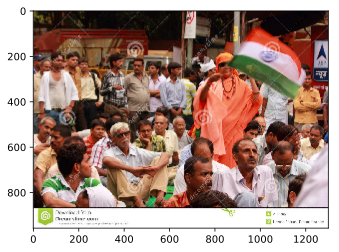

In [35]:
head_count('img/11.jpg')
